This notebook is for testing and determining isolation criteria for UCHVCs


I am returning on 9 July 2018 to start looking at this again

In [1]:
%matplotlib inline

In [2]:
import sys
#from pprint import pprint as p
#p(sys.path)

#even though I have added my python directory to path and pythonpath, it's not showing up
#so i'll add it here manually (and do this in all my future notebooks)
sys.path.append('/Users/adams/python')

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import ascii
from astropy import coordinates as coord
from astropy import units as u
import alfalfa
import uchvcs
from astropy.coordinates import SkyCoord

In [5]:
#get candidates catalog
name='/Users/adams/data/uchvcs/catalog/spring/spring_candidates.csv'
spring_cands=alfalfa.get_cat(name)

print 'done with cands'

#and code9s for comparison:
"""In July 2018, I got the most recent 100% a grids catalog from egg.astro.cornell.edu
However, it was missing HI size.
So I used an older a grids catalog that I had, which included 3s & 4s
I'm not 100% sure this is the full sky coverage (it might only be a70)
but I will proceed for now, and check w/ Martha later.
"""

code9s=ascii.read('/Users/adams/data/uchvcs/catalog/code9s_cat.txt')



print 'done with code 9s'

check got hiname
check got ra,dec
check got l,b
check got vels
done with cands
done with code 9s


In [6]:
print code9s.colnames

['AGC', 'HIname', 'RA', 'Dec', 'l', 'b', 'cz', 'vlsr', 'vgsr', 'vlg', 'vdev', 'w50', 'hsize', 'flux', 'SN', 'code']


In [7]:
#also want to get just spring code9s for comparison purposes
#ind1 = np.where( code9s['RA']<270 )
#ind2=np.where(code9s['RA']> 60)
ind=np.where((code9s['RA']<270) & (code9s['RA']> 60) )
spring_code9s = code9s[ind]

In [171]:
#get the WvW catalog for large-scale isolation
#I haven't created a script here, so I'll just do it myself here
#and can change later as needed
name='/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt'
tmp=ascii.read('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt')
#edited version adds a column (count, or number) plus cleans up notes at end of columns
print tmp.colnames
wvw_gl=tmp['L']
wvw_gb=tmp['B']
c=coord.Galactic(l=gl,b=gb,unit=(u.degree,u.degree))
crd = c.transform_to(coord.ICRS)
wvw_ra=crd.ra.degree
wvw_dec=crd.dec.degree
wvw_cz,wvw_vlsr,wvw_vgsr,wvw_vlg,wvw_vdev=alfalfa.get_vels(name) #note that this is my calculation of vels
#but everything except cz is in file
#So I should do a comparison at some point in time (but not now)

wvw_cat = Table([tmp['Count'],wvw_ra,wvw_dec,wvw_gl,wvw_gb,wvw_cz,wvw_vlsr,wvw_vgsr,wvw_vlg,wvw_vdev,tmp['Flux']],
                names=('ID','RA','Dec','l','b','cz','vlsr','vgsr','vlg','vdev','flux'))

print wvw_cat.colnames


#also want to get a "complex only" catalog
#which means excluding tmp['cpx'] with values 'CR', 'EN', 'EP' and 'P'

ind1 = np.where(tmp['cpx'] != 'CR')
ind2 = np.where(tmp['cpx'] != 'EN')
ind3 = np.where(tmp['cpx'] != 'EP')
ind4 = np.where(tmp['cpx'] != 'P')
ind5 = np.intersect1d(ind1,ind2)
ind6=np.intersect1d(ind5,ind3)
ind_cpx=np.intersect1d(ind6,ind4)

print len(ind1),len(ind2),len(ind3),len(ind4),len(ind_cpx),len(wvw_cat)

wvw_cat_cmplx = wvw_cat = Table([tmp['Count'][ind_cpx],wvw_ra[ind_cpx],wvw_dec[ind_cpx],wvw_gl[ind_cpx],wvw_gb[ind_cpx],
                                 wvw_cz[ind_cpx],wvw_vlsr[ind_cpx],wvw_vgsr[ind_cpx],wvw_vlg[ind_cpx],
                                 wvw_vdev[ind_cpx],tmp['Flux'][ind_cpx]],
                names=('ID','RA','Dec','l','b','cz','vlsr','vgsr','vlg','vdev','flux'))

['Count', 'L', 'B', 'RA', 'dec', 'Vlsr', 'Vgsr', 'Vlgsr', 'Vdev', 'Vz', 'Tmax', 'N', 'Omega', 'Flux', 'err', 'ass', 'cpx', 'pop']
['ID', 'RA', 'Dec', 'l', 'b', 'cz', 'vlsr', 'vgsr', 'vlg', 'vdev', 'flux']
1 1 1 1 534 617


In [13]:
"""Do a comparison of my calculated velocity values compared to those from catalog for WvW.
Or do I even calculate them and just take them instead?"""

print tmp
print wvw_cat

Count   L     B     RA     dec    Vlsr   Vgsr  ... Omega  Flux err  ass  cpx pop
----- ----- ----- ------ ------- ------ ------ ... ----- ----- ---- ---- --- ---
    1  95.0  78.0 1319.0  3733.0  -95.0  -49.4 ...   0.5    16   12 -1.0  hn   N
    2 263.5  75.1 1212.0  1516.0  100.7   44.3 ...   3.2   217   64 -1.0  hp   P
    3 135.0  72.0 1230.0  4438.0  152.0  200.1 ...   0.8   107   77 -1.0  ip   P
    4  62.5  71.0 1412.0  3502.0  -98.0  -34.5 ...   0.8    68   50 -1.0  hn   N
    5  50.0  67.0 1435.0  3127.0  -88.0  -22.2 ...   1.0    36   27 -1.0  hn   N
    6 177.5  67.0 1115.0  3824.0  -86.0  -82.3 ...   1.0   770  566 -1.0   M   N
    7 257.5  66.0 1143.0   921.0   76.0  -11.4 ...   1.0    91   67 -1.0  wb   P
    8 150.7  65.6 1144.0  4747.0  -96.2  -52.9 ...  62.8 22820 1940 -1.0   M   N
    9 242.5  65.5 1124.0  1329.0   73.8   -7.0 ...   2.1   109   42 -1.0  wb   P
   10 102.5  64.0 1347.0  5050.0  -91.0    3.2 ...   1.1  1163  855 -1.0  hn   N
  ...   ...   ...    ...    

In [24]:
#Now need to get Local Galaxies
#Basically just dleted everything that wasn't coords or vel
#Need to figure out how to read this catalog properly, for general future use 
#Write a separate script for that
#Okay - I'm using way, way too much time to try and figure this out, when I can come 
#back and do it properly later
#And I'd rather focus on making plots and looking at criteria
#So I'll just use my old file that I can read, and worry about the new gals from DES later


lg=ascii.read('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
print lg.colnames
lg_ra,lg_dec = alfalfa.get_radec('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
#print lg_ra,lg_dec

['RA+Dec', 'vh', 'GalaxyName']


In [64]:
#Okay, now that I have all my catalogs (kind of) read-in, 
#I want to start looking at isolation criteria

#First, I want to look at separation of LG gals from each other
#Do this both in angular space (on the sky)
#Plus also in 3-D space
#What linking scale do I want to use?
#Say that typical size is 1 kpc, with velocity dispersion of 10 km/s, at distance of 1 Mpc
#Then typical size is 206", or ~3.4'. If I want a separation in velocity equal to spatial size,
#That's ~25 km/s (~FWHM) to 3.5' (rounding numbers), or .14' per km/s, or 0.00233 deg per km/s
#Note that this probably on high side for angular size, so I might want to change this number



#First, get angular distance of each LG galaxy from 1st, 2nd, 3rd nearest neighbor (will probably use 3rd?)
#First put into skycoords

coord_LG = SkyCoord(lg_ra,lg_dec,"icrs", unit="deg")
lgangdist_1st = np.zeros(len(lg_ra))
lgangdist_2nd = np.zeros(len(lg_ra))
lgangdist_3rd = np.zeros(len(lg_ra))


for i,gal in enumerate(lg['GalaxyName']):
    sep = coord_LG.separation(coord_LG[i])
    first = np.sort(sep)[1]
    second = np.sort(sep)[2]
    third = np.sort(sep)[3]
    lgangdist_1st[i]=first.value    #this is the only way I can set things - by getting value (in degs) and dropping astropy units
    lgangdist_2nd[i]=second.value
    lgangdist_3rd[i]=third.value

    
#Also get the 3D distance
#I had defined 3D distance as
#sqrt( angdist^2 + (f*dv)^2)
#So I can just modify code above to add an extra calculation

lg3ddist_1st = np.zeros(len(lg_ra))
lg3ddist_2nd = np.zeros(len(lg_ra))
lg3ddist_3rd = np.zeros(len(lg_ra))

#check that there are velocities; otherwise assume velocity offset is zero (conservative estimate)
#Looks like 999.9 is my "no vel" value; otherwise value is good
ind_novel = np.where(lg['vh']== 999.9)[0]
print ind_novel

for i,gal in enumerate(lg['GalaxyName']):
    sep = coord_LG.separation(coord_LG[i])
    angsep = np.array(sep.value)
    #check that there are velocities; otherwise assume velocity offset is zero (conservative estimate)
    #Looks like 999.9 is my "no vel" value; otherwise value is good
    dv = np.array (lg['vh']-lg['vh'][i])
    dv[ind_novel] = 0
    sep3d = np.sqrt((angsep)**2 + (0.00233*dv)**2)
    first = np.sort(sep3d)[1]
    second = np.sort(sep3d)[2]
    third = np.sort(sep3d)[3]
    lg3ddist_1st[i]=first
    lg3ddist_2nd[i]=second
    lg3ddist_3rd[i]=third


[26]


(0, 50)

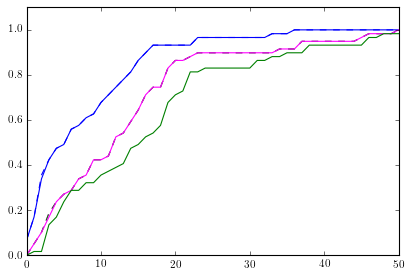

In [84]:
#OKAY!
#Now I should have 1st-3rd nearest neighbors, so let's make plots!

#I want to plot cumulative fraction with Nth nearest neighbor as a function of distance
#For both angular separation and 3D

#print lg3ddist_1st, lgangdist_1st

values_lg_2d_first, bins = np.histogram(lgangdist_1st, bins=100,range=(0,100))
cum_lg_2d_first = np.cumsum(values_lg_2d_first)/float(len(lg))

#print values_lg_2d_first
#print cum_lg_2d_first

values_lg_3d_first, bins = np.histogram(lg3ddist_1st, bins=100,range=(0,100))
cum_lg_3d_first = np.cumsum(values_lg_3d_first)/float(len(lg))

#print values_lg_3d_first
#print cum_lg_3d_first

values_lg_2d_second, bins = np.histogram(lgangdist_2nd, bins=100,range=(0,100))
cum_lg_2d_second = np.cumsum(values_lg_2d_second)/float(len(lg))

#print lgangdist_2nd, cum_lg_2d_second

values_lg_3d_second, bins = np.histogram(lg3ddist_2nd, bins=100,range=(0,100))
cum_lg_3d_second = np.cumsum(values_lg_3d_second)/float(len(lg))

values_lg_2d_third, bins = np.histogram(lgangdist_3rd, bins=100,range=(0,100))
cum_lg_2d_third = np.cumsum(values_lg_2d_second)/float(len(lg))

values_lg_3d_third, bins = np.histogram(lg3ddist_3rd, bins=100,range=(0,100))
cum_lg_3d_third = np.cumsum(values_lg_3d_third)/float(len(lg))


# plot the cumulative function
plt.plot(bins[:-1], cum_lg_2d_first, c='blue',linestyle='--')
plt.plot(bins[:-1],cum_lg_2d_second,c='magenta',linestyle='--')
plt.plot(bins[:-1],cum_lg_2d_third,c='green',linestyle='--')

plt.plot(bins[:-1], cum_lg_3d_first, c='blue')
plt.plot(bins[:-1],cum_lg_3d_second,c='magenta')
plt.plot(bins[:-1],cum_lg_3d_third,c='green')



#plt.plot([25,25],[0,1],'k')
#plt.plot([18,18],[0,1],'k')

#plt.axis([0,1.1,0,100])

plt.ylim(0,1.1)
plt.xlim(0,50)


#Given how I defined 3D separation, there is essentially no difference form 2D
#Makes sense since I used a very small linking value
#I will have to return to looking at that value more closely
#What I can se, is that galaxies are clustered
#Might want to move to an even further nearest neighbor, e.g., 5, 7, or 9
#That way I can remove LSS effects (we know galaxies come together

#So, I want to do that, and then also look at separation from WvW and code 9s in ALFALFA (for those in spring footprint)
#In order to do that, I would like to work on making some general purpose code first
#That way I can play around and experiment easily

In [85]:
#Worked on general code in uchvcs.py
#Copy here and see if it works, then update there once it works

In [150]:
def get_Nth_neighbor(coords1,vel1,coords2=None,vel2=None, N=3, f=0.2):
    #coords1: skycoord for primary catalog for whcih I want nearest neighbors
    #vel1: velocities for primary catalog
    #coords2,vel2: same but for catalog from which I compute distances
    #If none is given, default to primary (w/in self)
    #N: Nth nearest neihgbor
    #f: linking scale for 3D distancs
    #Note: if any values are missing (e.g., vels) need to make sure to replace iwth NaNs before using here
    #first check if I need to ignore source or not:
    if coords2 == None:
        ind_neighbor = N
    else:
        ind_neighbor = N-1
    if coords2 == None:
        coords2 = coords1
    if vel2 == None:
        vel2 = vel1 #even if coords is different, can ignore 3d part if not given
   

    dist2d = np.zeros(len(coords1))
    dist3d = np.zeros(len(coords1))
    for i,c in enumerate(coords1):
        sep = coords2.separation(coords1[i])
        angsep = np.array(sep.value)
        dv = vel1[i] - vel2
        dist2d[i] = np.sort(angsep)[ind_neighbor]
        sep3d = np.sqrt((angsep)**2 + (f*dv)**2)
        dist3d[i] = np.sort(sep3d)[ind_neighbor]

    return dist2d,dist3d

In [151]:
def plot_Nth_neighbors(coords1,vel1,coords2=None,vel2=None,N=[3],f=[0.2]):
    #plots the Nth nearest neighbors
    #same inputs as get_Nth_neighbor
    #Except! coords2, vel2, N, f can all be arrays
    #Which means they must be passed as lists!
    #in practice, it will be easiest to only iterate on one at a time
    if coords2 == None:
        N=np.array(N)+1 #since I won't subtract from it when calling get_Nth_neighbors because I'll pass c2
#    else:
#        ind_neighbor = np.array(N)-1
    if coords2 == None:
        coords2 = [coords1]
    if vel2 == None:
        vel2 = vel1 #even if coords is different, can ignore 3d part if not given
    #now I will have to be fancy with my iteration, am assuming I can iterate over almost everything
    #Not sure if there's an order that makes most sense - top down or bottom up?
    #Will go top down and just try and make sure I only ever call this function in a reasonable manner
    ntot = len(coords2)*len(N)*len(f)
    dist2d = []#np.empty(ntot,len(coords1))
    dist3d = []#np.empty(ntot,len(coords1))
    label = [] #np.empty(ntot)
    i=0 #index
    for k,[cat2,v2] in enumerate(zip(coords2,vel2)):
        for neigh in N:
            for link in f: #only iterate for 3D
                d2d,d3d = get_Nth_neighbor(coords1,vel1,cat2,v2, neigh, link)
                dist2d.append(d2d) #[i,:] = d2d
                dist3d.append(d3d) #[i,:] = d3d
                label.append('Cat'+str(k)+', '+str(neigh)+'N w/ f='+str(link))
                #i=i+1
    #now do the plotting!
    fig, ax1=plt.subplots(1,1,figsize=(6,6))
    for i in xrange(len(label)):
        values2d, bins = np.histogram(dist2d[i], bins=500,range=(0,100))
        cum2d = np.cumsum(values2d)/float(len(coords1))
        values3d, bins = np.histogram(dist3d[i], bins=500,range=(0,100))
        cum3d = np.cumsum(values3d)/float(len(coords1))
        plt.plot(bins[:-1], cum2d,linestyle='--',label='2D, '+label[i])
        plt.plot(bins[:-1], cum3d,label='3D, '+label[i])
        plt.ylim(0,1.1)
        plt.xlim(0,100)
        plt.legend(loc=1)

    return fig

In [152]:
dist2d,dist3d = get_Nth_neighbor(coord_LG,lg['vh']) #,coords2=None,vel2=None, N=3, f=0.2)

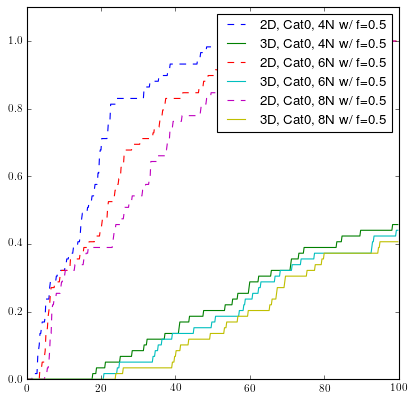

In [157]:
fig = plot_Nth_neighbors(coord_LG,lg['vh'],N=[3,5,7],f=[0.5]) #(coords1,vel1,coords2=None,vel2=None,N=[3],f=[0.2]):

#Seeing lots of close things in angular sep,b ut can focus on 3D
#Also think that could be effects of And satellites
#f=0.5 set for HVC from Peek

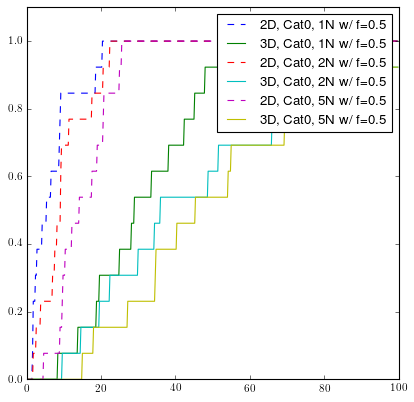

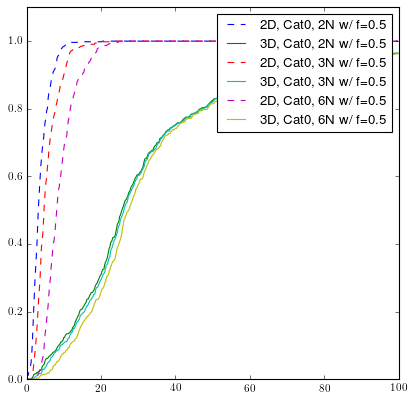

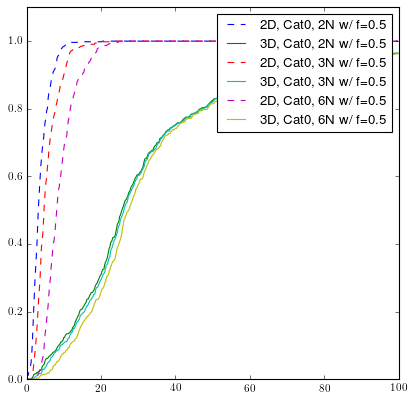

In [175]:
#Now that I have spring LG gals only, do code 9 comparison
coord_wvw = SkyCoord(wvw_cat['RA'],wvw_cat['Dec'],"icrs", unit="deg")
coord_wvw_cmplx = SkyCoord(wvw_cat_cmplx['RA'],wvw_cat_cmplx['Dec'],"icrs", unit="deg")

fig = plot_Nth_neighbors(coord_LG_spring,lg_spring_vel,coords2=[coord_wvw],
                         vel2=[wvw_cat['cz']],N=[1,2,5],f=[0.5])

fig2 = plot_Nth_neighbors(coord_wvw,wvw_cat['cz'],N=[1,2,5],f=[0.5])

fig3 = plot_Nth_neighbors(coord_wvw_cmplx,wvw_cat_cmplx['cz'],N=[1,2,5],f=[0.5])

In [ ]:
fig = plot_Nth_neighbors(coord_LG,lg['vh'],N=[3,5,7],f=[0.5]) #(coords1,vel1,coords2=None,vel2=None,N=[3],f=[0.2]):

#Seeing lots of close things in angular sep,b ut can focus on 3D
#Also think that could be effects of And satellites
#f=0.5 set for HVC from Peek

In [154]:
#I think 3rd nearest neighbor in 3D is reasonable; could be ~30deg - gets everything. Or slightly larger
#Now want to compare to code 9s
#But only in spring, which means I need to find things that are in ALFALFA footprint from LG cat
#For best comparison

#print lg_ra, lg_dec


ind_lg_spring_ra = np.where((lg_ra > 112.5) & (lg_ra < 247.5))

ind_lg_spring_dec = np.where((lg_dec > 0) & (lg_dec < 36))

#and (lg_dec > 0) and (lg_dec < 36))

print ind_lg_spring_ra
print ind_lg_spring_dec


ind_lg_spring = np.intersect1d(ind_lg_spring_ra,ind_lg_spring_dec)

print ind_lg_spring

lg_spring_vel = lg['vh'][ind_lg_spring]
coord_LG_spring = coord_LG[ind_lg_spring]



(array([ 2,  3,  4,  6,  7,  8,  9, 11, 13, 14, 18, 19, 20, 21, 22, 23, 51,
       53, 58]),)
(array([ 2,  4,  5,  7,  8,  9, 16, 18, 19, 20, 21, 22, 23, 29, 32, 35, 37,
       38, 41, 43, 44, 45, 46, 50, 51, 53]),)
[ 2  4  7  8  9 18 19 20 21 22 23 51 53]


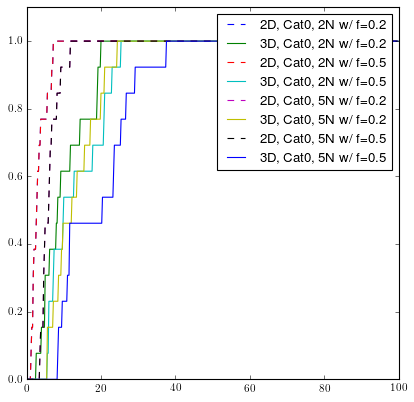

In [166]:
#Now that I have spring LG gals only, do code 9 comparison
coord_spring_code9s = SkyCoord(spring_code9s['RA'],spring_code9s['Dec'],"icrs", unit="deg")

fig = plot_Nth_neighbors(coord_LG_spring,lg_spring_vel,coords2=[coord_spring_code9s],
                         vel2=[spring_code9s['cz']],N=[2,5],f=[0.2,0.5])

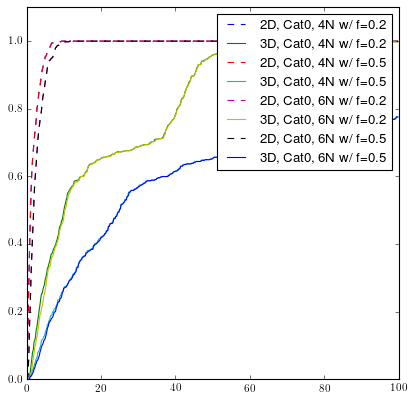

In [165]:
#also look at code9s compared to code9s
fig = plot_Nth_neighbors(coord_spring_code9s,spring_code9s['cz'],N=[3,5],f=[0.2,0.5])

In [164]:
print len(spring_code9s)
#print spring_code9s['cz']
print max(spring_code9s['cz']), min(spring_code9s['cz'])

562
338 -462


In [45]:
#now I want to check isolation from WvW catalog - here is where I will have strictest criterion.
#Will look only at spring sky
#i would like to be able to add a column to spring_cands that contains the distance to nearest WvW cloud using f=0.5 ()
#note that this is just using add_col_neigh_dist with Nth=1 (default, takes closets objects)
#print spring_cands

spring_cands_wvw = alfalfa.add_col_neigh_dist(spring_cands,wvw,name='WvW')

#print spring_cands_wvw

lg_wvw = alfalfa.add_col_neigh_dist(lg,wvw,name='WvW')

lg_spring_wvw = alfalfa.add_col_neigh_dist(lg_spring,wvw,name='WvW')

#get same for WvW catalog - want to know the typical linking scale there

wvw_dist = alfalfa.add_col_neigh_dist(wvw,wvw,Nth=2,name='dist_wvw')

print lg_spring_wvw

codes9s = alfalfa.add_col_neigh_dist(code9s,wvw,name='WvW')

spring_code9s=alfalfa.add_col_neigh_dist(spring_code9s,wvw,name='WvW')

#print lg_wvw

       AGC               HIname       ...         SN              WvW     
------------------ ------------------ ... ------------------ -------------
-1.72723371102e-77 -1.72723371102e-77 ... -1.72723371102e-77 42.5164740474
2.68156175181e+154 -1.72723381839e-77 ... -2.6815617518e+154 28.3538523982
2.96439387505e-323 2.21291626788e-314 ...     0.111004847399 29.1585738292
               0.0  1.28501997096e-05 ...     0.252238656195 25.1476807142
     69.6240234375 2.21291096854e-314 ...     0.347330687835  38.286607322
 1.15998411999e-28 2.21291097249e-314 ...     0.798036785013 19.1141316563
1.99270016953e+209 2.18057566844e-314 ...     0.537364354603 48.1220519891
1.44499267528e+214 2.21542499193e-314 ...     0.126700150186 33.7628150755
3.80985006741e+180                1.0 ...     0.520671155277 45.2060538498
4.71357970852e+257                0.0 ...     0.176260301403  19.796260463
     67.2312089178 -1.72723381839e-77 ...     0.386070644982 18.8811561981
9.11746622491e-309 8.3440

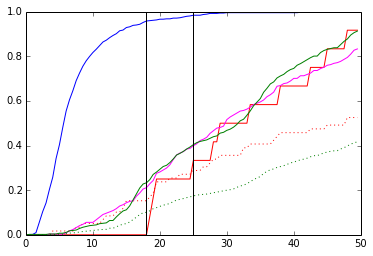

In [46]:
#sweet
#now I want to plot the distance to nearest WvW neighbor for these different pops
#will also want to separate spring sky LG gals
#want to do this as cumulative distribution function - is there an easy way to do this in matplotlib?
values_wvw, bins = np.histogram(wvw_dist['dist_wvw'], bins=100,range=(0,50))
n_wvw= float(len(wvw_dist['dist_wvw']))
cum_wvw = np.cumsum(values_wvw)

values_gals, bins = np.histogram(lg_wvw['WvW'], bins=100,range=(0,50))
cum_gals = np.cumsum(values_gals)/float(len(lg_wvw))

values_cands,bins = np.histogram(spring_cands_wvw['WvW'], bins=100,range=(0,50))
cum_cands = np.cumsum(values_cands)/float(len(spring_cands_wvw))

#get spring gals only:
values_spring_gals, bins = np.histogram(lg_spring_wvw['WvW'], bins=100,range=(0,50))
cum_spring_gals = np.cumsum(values_spring_gals)/float(len(lg_spring_wvw))
            
values_code9s,bins = np.histogram(code9s['WvW'], bins=100,range=(0,50))
cum_code9s = np.cumsum(values_code9s)/float(len(code9s))


values_spring_code9s,bins = np.histogram(spring_code9s['WvW'], bins=100,range=(0,50))
cum_spring_code9s = np.cumsum(values_spring_code9s)/float(len(spring_code9s))
    
# plot the cumulative function
plt.plot(bins[:-1], cum_wvw/n_wvw, c='blue')
plt.plot(bins[:-1],cum_gals,'r:')
plt.plot(bins[:-1],cum_spring_gals,'r')

plt.plot(bins[:-1],cum_cands,c='magenta')

plt.plot(bins[:-1],cum_code9s,'g:')
plt.plot(bins[:-1],cum_spring_code9s,'g')

plt.plot([25,25],[0,1],'k')
plt.plot([18,18],[0,1],'k')



In [6]:
#now do a bunch of distance calcs all at once
n=[1,3,5,7,11,1,3,5,7,11,1,3,5,7,11,1,3,5,7,11]
f=[0.2,0.2,0.2,0.2,0.2,0.5,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1]
dist_cands=alfalfa.add_col_neigh_dist(cands,code9s,Nth=n,fv=f)


ERROR: NameError: name 'cands' is not defined [IPython.core.interactiveshell]


NameError: name 'cands' is not defined

In [ ]:
#now let's make some plots!
#plot cdf for different dist values

#values, base = np.histogram(data, bins=40)
#evaluate the cumulative
#cumulative = np.cumsum(values)
# plot the cumulative function
#plt.plot(base[:-1], cumulative, c='blue')

sorted_N3_f_2=np.sort(distcat['N3_f0.2'])
sorted_N3_f_1=np.sort(distcat['N3_f0.1'])
sorted_N3_f_5=np.sort(distcat['N3_f0.5'])
sorted_N3_f1=np.sort(distcat['N3_f1'])

# Cumulative distributions:
plt.step(sorted_N3_f_2, np.arange(sorted_N3_f_2.size),label='f=0.2')  # From 0 to the number of data points-1
#plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0
plt.step(sorted_N3_f_1, np.arange(sorted_N3_f_1.size),label='f=0.1')
plt.step(sorted_N3_f_5, np.arange(sorted_N3_f_5.size),label='f=0.5')
plt.step(sorted_N3_f1, np.arange(sorted_N3_f1.size),label='f=1')

plt.axis((0,60,0,350))
plt.legend()

plt.show()

In [3]:
name='/Users/adams/data/uchvcs/catalog/spring/spring_candidates.csv'
spring_cands=alfalfa.get_cat(name)

In [4]:
print spring_cands

 AGC         HIname            RA      ...     hsize     flux  SN 
------ ----------------- ------------- ... ------------- ---- ----
174540 HI074559.9+145850 116.501666667 ... 7.93725393319  2.2 29.1
    -- HI074824.2+021738     117.10125 ... 11.1579568022 0.74  0.0
174728 HI075149.4+064516       117.955 ...  4.7021271782 0.19  4.1
174541 HI075437.8+143239 118.659583333 ... 7.18261790714 2.27 26.5
    -- HI075522.6+025152       118.845 ... 5.90423576765 0.53  0.0
188988 HI080238.1+052552      120.6575 ... 3.65102725271 0.41  0.0
    -- HI080245.0+030115     120.68875 ... 9.29838695689 0.55  4.7
    -- HI080312.3+264257 120.806666667 ... 12.6510869098 1.02  9.5
    -- HI080750.9+021518      121.9625 ...  6.5574385243 0.33  5.1
    -- HI081006.0+285826 122.531666667 ... 8.61162005664 0.83  9.3
189029 HI081153.6+280111 122.977083333 ...  7.4296702484 1.55 17.6
   ...               ...           ... ...           ...  ...  ...
268242 HI162009.9+260439      245.0475 ...           3.0 0.25 

In [ ]:
tmp=4
print tmp

In [15]:
print min(code9s['vdev']),max(code9s['vdev'])
print len(np.where(code9s['vdev'] == 0)[0])
print min(abs(code9s['vdev']))

-454.217788991 342.90791439
3
0.0
